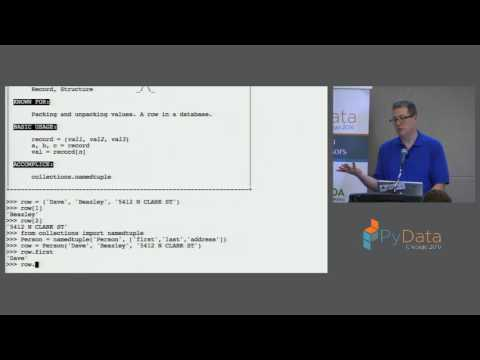

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('lyDLAutA88s', width=800, height=300)

In [2]:
# 1. Посмотрите видео Дэвида Бизли про встроенные инструменты Python
# 2. Попробуйте используя встроенные инструменты Python проанализировать таблицу из файла "Vacancy.csv"
# 3. Попробуйте ответить на вопросы:
# Сколько вакансий, которые вам нравятся?
# За какие периоды эти вакансии?
# Сколько вакансий с такими позициями, на которых вы работаете?
# Сколько вакансий для аналитика данных?
# Сколько вакансий для аналитика данных с использованием Python?

# В задании важно не использовать pandas и numpy, а встроенные инструменты python
# Counter, CSV, defaultdict, sorted

In [3]:
import csv

In [4]:
import sys

In [5]:
csv.field_size_limit(1500000)

131072

In [6]:
vacs = list(csv.DictReader(open('vacancy.csv', encoding='UTF-8')))

In [7]:
total_len = len(vacs)
total_len

4002

In [8]:
vacs[0]

{'id': '383479',
 'created_at': '2021-03-14 09:39:21.854462',
 'updated_at': '2021-03-14 09:39:21.854584',
 'vacid': '1474941',
 'vactitle': 'Senior java-разработчик (в команду Онбординга)',
 'vacdescription': ' Работа у нас — это:команда профессионалов, готовых поддержать ваши инициативы;мощное железо, дополнительные мониторы и всё, что нужно для продуктивной работы;обучение за счёт компании;гибкий графиккрасивый и комфортный офис  г. Санкт-Петербург, м. Ладожская  пл. Карла Фаберже 8 ВДМС;прозрачная система бонусов и премий, достойная зарплата — размер обсудим на собеседовании.Информация о проекте:Наша команда делает новые экспериментальные фичи для СБОЛа.Сейчас мы разрабатываем систему, с помощью которой разные команды Сбера смогут создавать квесты для мобильного приложения.Также мы будем разрабатывать внутреннюю платформу для продуктовых экспериментов. Описание команды:2-pizza team: сейчас у нас работают разработчики iOS и Android, продакт и аналитик. К команде в ближайшее время по

# Сколько вакансий, которые вам нравятся?

In [9]:
vacs[0]['vactitle']

'Senior java-разработчик (в команду Онбординга)'

In [10]:
vactitles = []
for i in range(len(vacs)):
    vactitles.append(str(vacs[i]['id']) + ':' + vacs[i]['vactitle'].lower())
vactitles

['383479:senior java-разработчик (в команду онбординга)',
 '383480:дизайнер мобильных приложений',
 '383481:старший специалист отдела мониторинга залогового обеспечения',
 "383482:аналитик/разработчик  (программа 'миграция legacy ас на фабрику данных')",
 '383483:java разработчик (команда functions)',
 '383484:главный инженер (ngfw)',
 '383485:ведущий инженер по кибербезопасности (защита контейнеров)',
 '383486:тестировщик-автоматизатор (qa)',
 '383487:ведущий специалист (отдел технических средств охраны)',
 '383488:инженер поддержки тестирования',
 '383489:data - аналитик',
 '383490:ведущий специалист (управление комплаенс)',
 '383491:клиентский менеджер по работе с корпоративными клиентами',
 '383492:главный инженер (pentest)',
 '383493:devops (центр снабжения)',
 '383494:qa',
 '383495:data engineer (bigdata и ml)',
 '383496:лидер ас',
 '383497:системный аналитик. сервис автокредитование',
 '383498:руководитель направления abap',
 '383499:abap разработчик под асус ewm',
 '383500:анал

In [11]:
black_list = [
    'qa',
    'senior',
    'лидер',
    'руководитель',
    'abap',
    'product owner',
    'стажер',
    'pentest',
    'старший менеджер по обслуживанию',
    'менеджер по продажам',
    'sas',
    'кассир',
    'водитель',
    'инкассатор',
    'консультант по работе с пфр',
    'начальник сектора',
    'клиентский менеджер',
    'кассир',
    'автотестировщик',
    'рук-ль',
    'ведущий специалист поддержки комплаенс',
    'консультант',
    'практика',
    'javascript',
    'специалист по взысканию',
    'дизайнер',
    'архитектор',
    'администратор',
    'специалист по прямым продажам',
    'ui',
    'ui/ux',
    'главный',
    'менеджер по продаже',
    'devops инженер',
    'etl-разработчик',
    'стажёр',
    'стажер',
    'android',
    'ios',
    'web',
    'devops',
    'методолог',
    'менеджер',
    'инженер по нагрузочному тестированию',
    'frontend',
    'старший специалист судебного и исполнительного производства',
    'java',
    'kotlin',
    'groovy',
    'инспектор',
    'project manager',
    'js',
    'fullstack',
    'инженер по сопровождению',
    'тестировщик',
    'инвестиционный советник',
    'аудитор',
    'юрисконсульт',
    'sap',
    'тестированию',
    '.net',
    'адмистратор по сопровождению',
    'лингвист',
    'product manager',
    'chief information',
    'психолог',
    'инженер дежурной смены',
    'delivery lead',
    'секретарь',
    'директор',
    'заместитель',
    'технолог',
    'разработчик ксш',
    'team lead',
    'кадровый резерв',
    'коуч',
    'designer',
    'с/с++',
    'full-stack',
    'middle',
    'senior',
    'охранник',
    'front-end',
    'scala',
    'разработчик субд',
    'lead',
    'pl/sql',
    'охранник',
    'sql - разработчик',
    'technical lead',
    'full stack',
    'scala',
    'etl',
    'с#',
    'экономист',
    'data engineer',
    'c#',
    'kubernetes',
    'andorid',
    'ux',
    'стажировок',
    'координатор',
    'преподаватель',
    'ibso'
]

In [12]:
vactitles[0].__contains__('qa')

False

In [13]:
while_list = []

In [14]:
for vactitle in vactitles:

    is_ok = True
    for black_worb in black_list:
        if vactitle.__contains__(black_worb):
            is_ok = False
    if is_ok:
        while_list.append(vactitle)

In [15]:
while_list

['383481:старший специалист отдела мониторинга залогового обеспечения',
 "383482:аналитик/разработчик  (программа 'миграция legacy ас на фабрику данных')",
 '383485:ведущий инженер по кибербезопасности (защита контейнеров)',
 '383487:ведущий специалист (отдел технических средств охраны)',
 '383488:инженер поддержки тестирования',
 '383489:data - аналитик',
 '383490:ведущий специалист (управление комплаенс)',
 '383497:системный аналитик. сервис автокредитование',
 '383500:аналитик (информационная безопасность)',
 '383502:инженер по разработке',
 '383508:системный аналитик',
 '383519:инженер удостоверяющего центра',
 '383538:старший инженер',
 '383540:бизнес/системный аналитик',
 '383543:системный аналитик',
 '383559:инженер по разработке',
 '383569:ведущий инженер (сопровождение системы визуализации отчетности)',
 '383572:инженер по диспетчеризации цод',
 '383575:python разработчик (команда "ису")',
 '383576:специалист по разметке данных',
 '383577:аналитик на разметку данных',
 '383579

In [16]:
len(while_list)

933

In [17]:
green_list = [
    'data scientist',
    'data',
    'scientist',
    'analysis',
    'аналитик',
    'analyst',
    'analist'
    'анализ',
    'ml',
    'ds'
]

In [18]:
res = []

In [19]:
for vactitle in while_list:

    is_ok = False
    for green_worb in green_list:
        if vactitle.__contains__(green_worb):
            is_ok = True
    if is_ok:
        res.append(vactitle)

In [32]:
len(res)

400

## Ответ - 400

# За какие периоды эти вакансии?

In [21]:
ids = []

for i in range(len(res)):

    ids.append(res[i].split(':')[0])
ids

['383482',
 '383489',
 '383497',
 '383500',
 '383508',
 '383540',
 '383543',
 '383577',
 '383579',
 '383589',
 '383600',
 '383615',
 '383616',
 '383617',
 '383623',
 '383657',
 '383675',
 '383700',
 '383714',
 '383749',
 '383750',
 '383756',
 '383766',
 '383776',
 '383781',
 '383782',
 '383789',
 '383804',
 '383820',
 '383821',
 '383822',
 '383824',
 '383833',
 '383847',
 '383860',
 '383863',
 '383868',
 '383884',
 '383917',
 '383938',
 '383939',
 '383981',
 '384006',
 '384008',
 '384014',
 '384019',
 '384028',
 '384033',
 '384052',
 '384056',
 '384059',
 '384063',
 '384068',
 '384084',
 '384087',
 '384089',
 '384104',
 '384119',
 '384121',
 '384127',
 '384157',
 '384180',
 '384183',
 '384225',
 '384243',
 '384250',
 '384254',
 '384258',
 '384259',
 '384287',
 '384300',
 '384302',
 '384306',
 '384322',
 '384332',
 '384338',
 '384364',
 '384368',
 '384372',
 '384385',
 '384391',
 '384397',
 '384401',
 '384439',
 '384443',
 '384449',
 '384473',
 '384486',
 '384491',
 '384530',
 '384538',

In [22]:
created = set()
updated = set()
for vac in vacs:
    if ids.__contains__(vac['id']) :
        created.add(vac['created_at'])
        updated.add(vac['updated_at'])

In [23]:
created

{'2021-03-14 09:39:21.854462'}

In [24]:
updated

{'2021-03-14 09:39:21.854584'}

## Ответ: За 2021-03-14

# Сколько вакансий с такими позициями, на которых вы работаете?

In [25]:
counter = 0
for vactitle in vactitles:
    if vactitle.__contains__('ведущий инженер по разработке'):
        counter += 1
counter

20

## Ответ - 20

# Сколько вакансий для аналитика данных?

In [26]:
counter = 0
for vactitle in vactitles:
    if (vactitle.__contains__('data analysis') or
        vactitle.__contains__('da') or
        vactitle.__contains__('data analyst') or
        vactitle.__contains__('data analist') or
        vactitle.__contains__('аналитик данных') or
        vactitle.__contains__('data - аналитик') or
        vactitle.__contains__('data аналитик') ):
        counter += 1
counter

183

## Ответ - 183

# Сколько вакансий для аналитика данных с использованием Python?

In [27]:
ids = []

In [28]:
for i in range(len(vactitles)):
    vactitle = vactitles[i]
    if (vactitle.__contains__('data analysis') or
        vactitle.__contains__('da') or
        vactitle.__contains__('data analyst') or
        vactitle.__contains__('data analist') or
        vactitle.__contains__('аналитик данных') or
        vactitle.__contains__('data - аналитик') or
        vactitle.__contains__('data аналитик') ):
        ids.append(vactitle.split(':')[0])
ids

['383489',
 '383495',
 '383601',
 '383609',
 '383617',
 '383623',
 '383685',
 '383700',
 '383749',
 '383750',
 '383776',
 '383804',
 '383840',
 '383847',
 '383856',
 '383863',
 '383918',
 '383922',
 '384008',
 '384015',
 '384059',
 '384115',
 '384144',
 '384183',
 '384232',
 '384252',
 '384287',
 '384300',
 '384342',
 '384372',
 '384373',
 '384397',
 '384431',
 '384433',
 '384449',
 '384464',
 '384530',
 '384577',
 '384609',
 '384625',
 '384673',
 '384697',
 '384709',
 '384721',
 '384722',
 '384842',
 '384851',
 '384901',
 '385002',
 '385028',
 '385087',
 '385165',
 '385171',
 '385202',
 '385206',
 '385219',
 '385223',
 '385238',
 '385242',
 '385243',
 '385279',
 '385288',
 '385294',
 '385297',
 '385321',
 '385364',
 '385371',
 '385378',
 '385403',
 '385421',
 '385475',
 '385478',
 '385541',
 '385542',
 '385546',
 '385552',
 '385579',
 '385589',
 '385654',
 '385670',
 '385705',
 '385710',
 '385734',
 '385748',
 '385759',
 '385788',
 '385800',
 '385804',
 '385808',
 '385830',
 '385842',

In [29]:
vacs_new = []
for vac in vacs:
    if ids.__contains__(vac['id']):
        vacs_new.append(vac)
len(vacs_new)

183

In [30]:
vacs_new[0]

{'id': '383489',
 'created_at': '2021-03-14 09:39:21.854462',
 'updated_at': '2021-03-14 09:39:21.854584',
 'vacid': '1525524',
 'vactitle': 'Data - аналитик',
 'vacdescription': 'Новая амбициозная agile-команда по созданию кластера Hadoop на собственном решении Сбербанка для нескольких заказчиков Блока Финансы.  У вас будет прекрасная возможность поработать с реальной BigData, в реальной Agile команде в крупнейшем Банке. Обязанности сотрудника:Data-архитектор - проектирование и поддержание логической модели данных,-профилирование данных,-проектирование Solution архитекторы,-исключение пересечений/дублирования,-формирование Запроса на изменение модели единого семантического слоя данных.Развитие компетенций в части внедрения изменений при использовании сервиса автоматизации на основе ETL инструментов. Требования к компетенциям:· знание Java Core, опыт разработки Java от года· опыт работы с любыми реляционными базами данных, владение SQL (DDL + DML)· навык работы с Maven, Git, Jira, Jenk

In [31]:
counter = 0
for vac in vacs_new:
    if vac['vacdescription'].lower().__contains__('python'):
        counter += 1
counter

126

## Ответ - 126